In [1]:
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import load_model
import numpy as np

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_ds = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset (1)/train_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')

test_ds = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset (1)/test_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')

Found 742 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(32,(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_ds,
                    steps_per_epoch = len(train_ds),
                    epochs = 20,
                    validation_data = test_ds,
                    validation_steps = len(test_ds))


Epoch 1/20
149/149 [==============================] - 503s 3s/step - loss: 1.3150 - accuracy: 0.3369 - val_loss: 1.2737 - val_accuracy: 0.3889
Epoch 2/20
149/149 [==============================] - 26s 171ms/step - loss: 1.0641 - accuracy: 0.5270 - val_loss: 1.0926 - val_accuracy: 0.5152
Epoch 3/20
149/149 [==============================] - 24s 161ms/step - loss: 0.8990 - accuracy: 0.6307 - val_loss: 0.8213 - val_accuracy: 0.7222
Epoch 4/20
149/149 [==============================] - 24s 163ms/step - loss: 0.7534 - accuracy: 0.7035 - val_loss: 0.6769 - val_accuracy: 0.7677
Epoch 5/20
149/149 [==============================] - 25s 167ms/step - loss: 0.7050 - accuracy: 0.7332 - val_loss: 0.7533 - val_accuracy: 0.6768
Epoch 6/20
149/149 [==============================] - 24s 161ms/step - loss: 0.6984 - accuracy: 0.7251 - val_loss: 0.6047 - val_accuracy: 0.7727
Epoch 7/20
149/149 [==============================] - 25s 165ms/step - loss: 0.6679 - accuracy: 0.7547 - val_loss: 0.6524 - val_accu

In [9]:
model.save('disaster.h5')


In [10]:
result = model.evaluate(test_ds)

40/40 [==============================] - 4s 100ms/step - loss: 0.7412 - accuracy: 0.7879


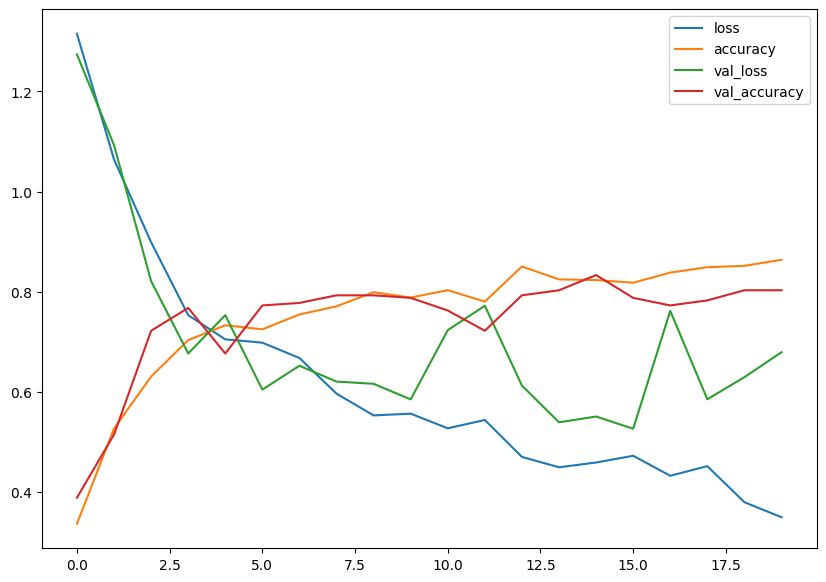

In [11]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [17]:
import keras.utils as image

In [13]:
model = load_model('disaster.h5')

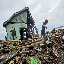

In [18]:
img = image.load_img("/content/drive/MyDrive/dataset (1)/test_set/Earthquake/1321.jpg", target_size = (64, 64))
img

In [19]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x), axis=-1)
pred

1/1 [==============================] - 0s 100ms/step


array([1])

In [20]:
index = ['Cyclone', 'Earthquake', 'Flood', 'WildFire']
result = np.array(index[pred[0]])
result

array('Earthquake', dtype='<U10')